In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('Research Project')

os.chdir('Complaints')

Mounted at /content/drive


In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [3]:
train_df = pd.read_csv('Complaints_train_cluster.csv',index_col=0)
test_df = pd.read_csv('Complaints_test_cluster.csv',index_col=0)

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,Consumer complaint narrative,Cluster_label,Product_label
9839,-0.083833,0.025042,0.008334,0.000675,-0.042669,-0.012381,0.038461,0.015007,0.046729,-0.020047,...,-0.007861,-0.045914,0.001090,0.086305,-0.073808,0.024158,-0.064357,have been contact the citibank many times in t...,0,1
9680,-0.081790,0.148205,-0.042367,0.027756,0.083137,0.024862,0.085368,0.022401,0.043612,-0.055573,...,0.017041,-0.034136,0.039998,0.011655,-0.017303,-0.080850,-0.067527,I have this police report where I stated that ...,3,1
7093,-0.044350,-0.026041,-0.006297,0.005036,-0.074694,-0.081422,-0.065680,-0.039237,-0.016127,0.021785,...,-0.006022,0.027847,0.032705,0.146138,-0.019185,0.010133,0.031411,"Despite several attempts, my request for the Q...",1,4
11293,-0.056506,0.083530,-0.005044,0.028992,-0.019537,-0.073100,0.057829,-0.014664,0.081014,0.008573,...,0.039044,-0.078067,0.029232,0.033195,-0.056825,-0.008719,-0.033704,We are the XXXX XXXX for a XXXX XXXX. On Tuesd...,0,0
820,-0.104689,0.054862,-0.051014,-0.000425,0.012914,-0.027044,-0.007013,0.002408,0.011021,-0.026056,...,0.029306,-0.057002,0.044272,0.060898,-0.020800,-0.041509,0.045269,XX/XX/XXXX -- - ; Just ended a call with an Ex...,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.112513,0.051863,-0.020471,0.017782,0.025972,0.012749,-0.004135,-0.004736,0.040195,0.038702,...,-0.005375,0.074497,0.015691,0.034502,-0.086842,-0.070787,0.102940,We have been working with XXXX on a short sale...,1,4
13418,-0.062001,0.065009,0.010454,-0.071212,-0.001330,-0.027116,0.004393,-0.032242,0.022440,-0.032508,...,-0.002463,-0.046562,0.014971,0.090554,-0.081978,0.015068,-0.062344,I am currently in Chapter XXXX bankruptcy and ...,1,5
5390,-0.004756,-0.039637,0.072436,-0.053156,-0.052933,0.002656,-0.046694,-0.043519,-0.015549,-0.053368,...,0.030568,-0.002195,-0.019709,0.044018,0.005256,-0.013465,-0.057967,XX/XX/2021 I have two inquires for a home refi...,1,4
860,-0.087219,0.043903,-0.061226,0.007919,0.009599,0.057278,-0.014900,-0.040100,-0.032876,-0.029716,...,-0.011279,-0.062755,-0.044514,0.123467,-0.008976,-0.039402,0.012657,I have disputed for over a year inaccurate inf...,3,2


In [5]:
X_train  = train_df.drop(columns=["Consumer complaint narrative",	"Cluster_label",	"Product_label"])
X_test = test_df.drop(columns=["Consumer complaint narrative",	"Cluster_label",	"Product_label"])
y_train = train_df["Product_label"]
y_test = test_df["Product_label"]

In [6]:
X_train.shape

(12000, 384)

In [7]:
def pca_retain_train(data, expvar =  0.95):
    stdscl = StandardScaler()
    standardized_data = stdscl.fit_transform(data)

    # Create PCA object and fit the standardized data
    pca = PCA()
    pca.fit(standardized_data)

    # Determine the number of components to retain 95% information
    explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(explained_variance_ratio_cumulative >= expvar) + 1

    # Perform PCA with the desired number of components
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(standardized_data)

    return stdscl, pca, transformed_data

def pca_retain_test(stdscl, pca, data):

    standardized_data = stdscl.transform(data)

    transformed_data = pca.transform(standardized_data)

    return transformed_data

In [8]:
stdscl_full, pca_full, X_train_transformed = pca_retain_train(X_train, expvar =  0.9)
X_valid_transformed = pca_retain_test(stdscl_full, pca_full,X_test)

In [9]:
print(X_train_transformed.shape, X_valid_transformed.shape)

(12000, 158) (3000, 158)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [11]:
X_train_sent = train_df["Consumer complaint narrative"]
X_test_sent = test_df["Consumer complaint narrative"]

In [12]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
fulltfidf_wm_train = tfidfvectorizer.fit_transform(X_train_sent)
fulltfidf_tokens_train = tfidfvectorizer.get_feature_names_out()
fulldf_tfidfvect_train = pd.DataFrame(data = fulltfidf_wm_train.toarray(),columns = fulltfidf_tokens_train)

In [13]:
fulltfidf_wm_valid = tfidfvectorizer.transform(X_test_sent)
fulldf_tfidfvect_valid = pd.DataFrame(data = fulltfidf_wm_valid.toarray(),columns = fulltfidf_tokens_train)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01],
    'max_iter': [3000],
    'l1_ratio': [0.2]  # l1_ratio specifies the balance between L1 (Lasso) and L2 (Ridge) penalties in the ElasticNet
}

# We increase `max_iter` to guarantee convergence
logreg = LogisticRegression(penalty='elasticnet', solver='saga', random_state=123)
lr_clf2 = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc_ovr', verbose=10)
lr_clf2.fit(fulldf_tfidfvect_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.01, l1_ratio=0.2, max_iter=3000.........................
[CV 1/5; 1/1] END C=0.01, l1_ratio=0.2, max_iter=3000;, score=0.920 total time= 4.6min
[CV 2/5; 1/1] START C=0.01, l1_ratio=0.2, max_iter=3000.........................
[CV 2/5; 1/1] END C=0.01, l1_ratio=0.2, max_iter=3000;, score=0.914 total time= 4.2min
[CV 3/5; 1/1] START C=0.01, l1_ratio=0.2, max_iter=3000.........................
[CV 3/5; 1/1] END C=0.01, l1_ratio=0.2, max_iter=3000;, score=0.918 total time= 4.2min
[CV 4/5; 1/1] START C=0.01, l1_ratio=0.2, max_iter=3000.........................
[CV 4/5; 1/1] END C=0.01, l1_ratio=0.2, max_iter=3000;, score=0.909 total time= 4.4min
[CV 5/5; 1/1] START C=0.01, l1_ratio=0.2, max_iter=3000.........................
[CV 5/5; 1/1] END C=0.01, l1_ratio=0.2, max_iter=3000;, score=0.910 total time= 4.4min


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='elasticnet',
                                          random_state=123, solver='saga'),
             param_grid={'C': [0.01], 'l1_ratio': [0.2], 'max_iter': [3000]},
             scoring='roc_auc_ovr', verbose=10)

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
y_train_pred = lr_clf2.predict_proba(fulldf_tfidfvect_train)
# y_train.shape
roc_auc_score(y_train, y_train_pred, average='macro',multi_class='ovo')

0.9246197451148649

In [17]:
y_test_pred = lr_clf2.predict_proba(fulldf_tfidfvect_valid)
# y_train.shape
roc_auc_score(y_test, y_test_pred, average='macro',multi_class='ovo')

0.9205081940218652

In [18]:
print("Mean accuray on train and test data", lr_clf2.score(fulldf_tfidfvect_train, y_train),lr_clf2.score(fulldf_tfidfvect_valid, y_test))

Mean accuray on train and test data 0.9247042710148804 0.9201614446545259


In [19]:
label_names = ['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Student loan']

In [20]:
import matplotlib.pyplot as plt

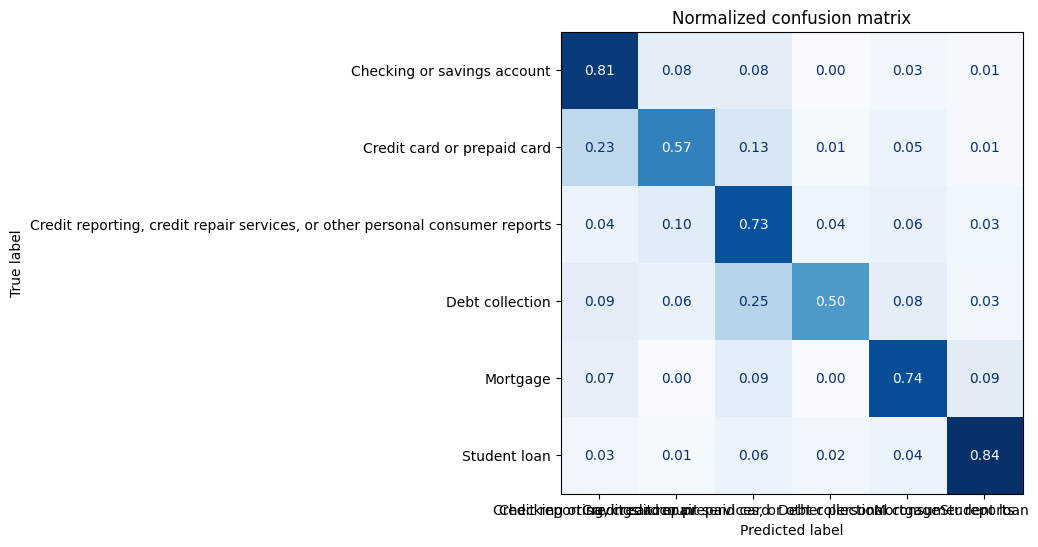

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()
y_preds = lr_clf2.predict(fulldf_tfidfvect_valid)
plot_confusion_matrix(y_preds, y_test,label_names)

In [22]:
n_clusters=6
segmented_data_train = []
segmented_sent_train = []
segmented_label_train = []
for cluster_id in range(0,n_clusters,1):
    cluster_points = X_train[train_df.Cluster_label == cluster_id]
    cluster_sents = X_train_sent[train_df.Cluster_label == cluster_id]
    cluster_senti_labels = y_train[train_df.Cluster_label == cluster_id]
    segmented_sent_train.append(cluster_sents)
    segmented_label_train.append(cluster_senti_labels)
    segmented_data_train.append(cluster_points)

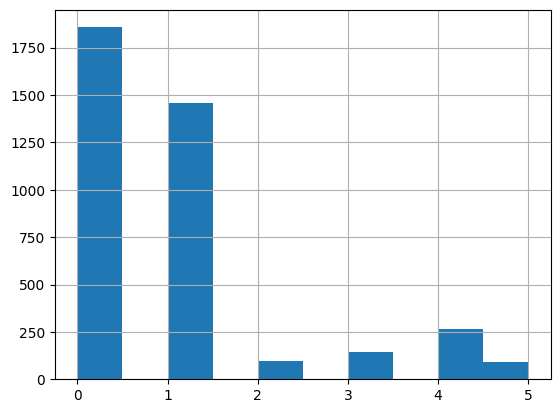

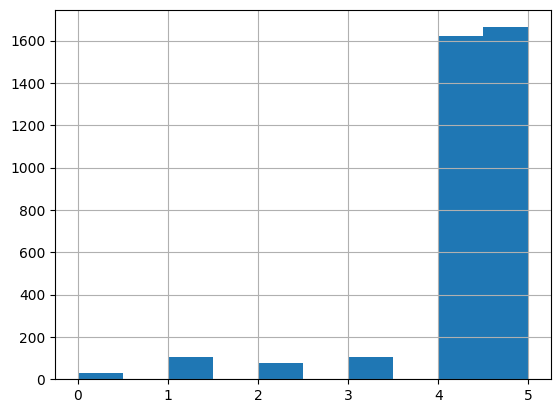

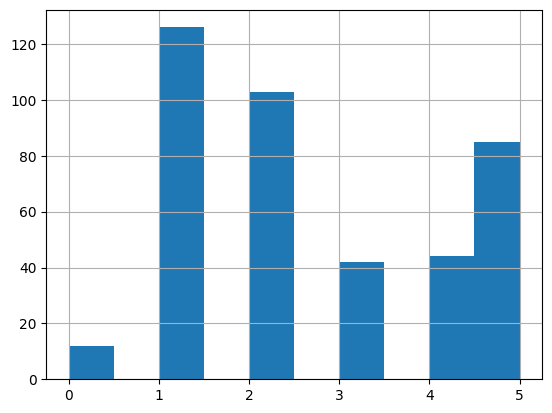

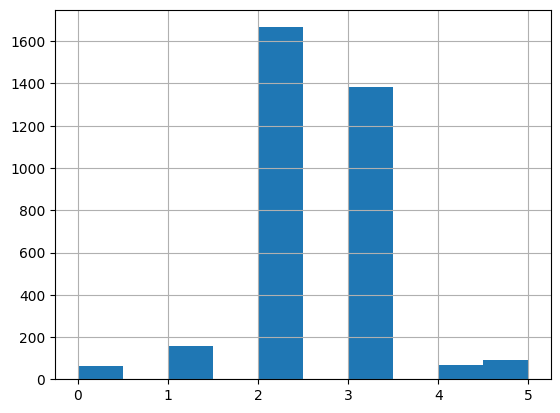

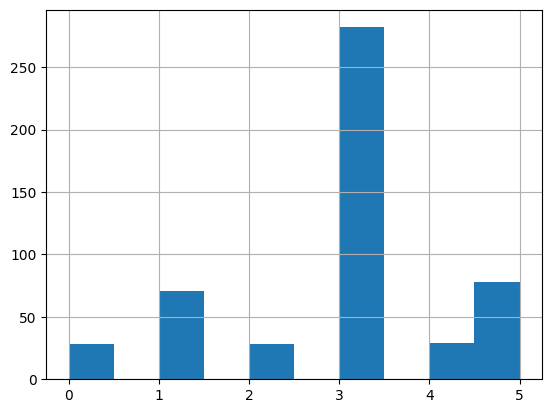

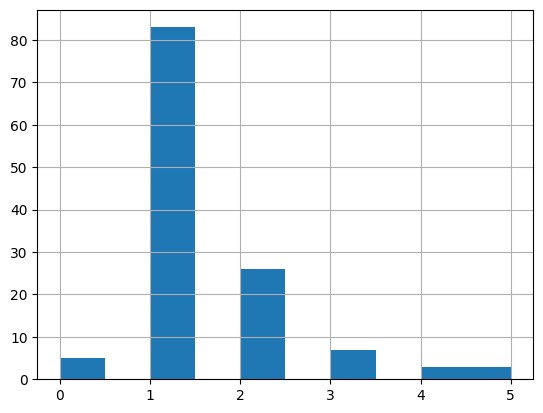

In [24]:
for cluster_id in range(0,n_clusters,1):
  segmented_label_train[cluster_id].hist()
  plt.show()

In [ ]:
segmented_data_valid = []
segmented_sent_valid = []
segmented_label_valid = []
for cluster_id in range(0,n_clusters,1):
    cluster_points = X_test[test_df.Cluster_label == cluster_id]
    cluster_sents = X_test_sent[test_df.Cluster_label == cluster_id]
    cluster_senti_labels = y_test[test_df.Cluster_label == cluster_id]
    segmented_sent_valid.append(cluster_sents)
    segmented_label_valid.append(cluster_senti_labels)
    segmented_data_valid.append(cluster_points)

In [ ]:
sub_tfidfvectorizer = [None]*6
segmented_fulldf_tfidfvect_train = []
segmented_fulldf_tfidfvect_valid = []
segmented_fulltfidf_tokens_train = []

for i in range(6):
    # We increase `max_iter` to guarantee convergence
    sub_tfidfvectorizer[i] = TfidfVectorizer(analyzer='word',stop_words= 'english')
    fulltfidf_wm_train = sub_tfidfvectorizer[i].fit_transform(segmented_sent_train[i])
    segmented_fulltfidf_tokens_train.append(sub_tfidfvectorizer[i].get_feature_names_out())
    segmented_fulldf_tfidfvect_train.append(pd.DataFrame(data = fulltfidf_wm_train.toarray(),columns = segmented_fulltfidf_tokens_train[i]))
    fulltfidf_wm_valid = sub_tfidfvectorizer[i].transform(segmented_sent_valid[i])
    segmented_fulldf_tfidfvect_valid.append(pd.DataFrame(data = fulltfidf_wm_valid.toarray(),columns = segmented_fulltfidf_tokens_train[i]))

In [ ]:
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [ ]:
Document_train = 6*[None]
Document_test = 6*[None]
for i in range(6):
    Document_train[i] = ' '.join(list(segmented_sent_train[i].values))
    Document_test[i] = ' '.join(list(segmented_sent_valid[i].values))

In [ ]:
# Create c-TF-IDF
count_vectorizer = CountVectorizer().fit(Document_train)
count = count_vectorizer.transform(Document_train)
ctfidf_vectorizer = CTFIDFVectorizer().fit(count, n_samples=12000)
ctfidf = ctfidf_vectorizer.transform(count)

In [ ]:
sub_tfidfvectorizer = [None]*6
segmented_ctfidfvect_train = []
segmented_ctfidfvect_valid = []
segmented_cttfidf_tokens_train = []

for i in range(6):
    count = count_vectorizer.transform(segmented_sent_train[i])
    fulltfidf_wm_train = ctfidf_vectorizer.transform(count)
    segmented_ctfidfvect_train.append(pd.DataFrame(data = fulltfidf_wm_train.toarray()))
    count = count_vectorizer.transform(segmented_sent_valid[i])
    fulltfidf_wm_train = ctfidf_vectorizer.transform(count)
    segmented_ctfidfvect_valid.append(pd.DataFrame(data = fulltfidf_wm_train.toarray()))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
sub_lr_clf2 = [None]*6
param_grid = {
    'C': [0.01],
    'l1_ratio': [0.2]  # l1_ratio specifies the balance between L1 (Lasso) and L2 (Ridge) penalties in the ElasticNet
}
for i in range(6):
    # We increase `max_iter` to guarantee convergence
    logreg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=3000, random_state=123)
    sub_lr_clf2[i] = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc_ovr')
    sub_lr_clf2[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass

In [ ]:
for i in range(6):
  print(sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))
  print(roc_auc_score(segmented_label_train[i], sub_lr_clf2[i].predict_proba(segmented_fulldf_tfidfvect_train[i]), average='macro',multi_class='ovo'), roc_auc_score(segmented_label_valid[i], sub_lr_clf2[i].predict_proba(segmented_fulldf_tfidfvect_valid[i]), average='macro',multi_class='ovo'))
  print()

0.6745887305201347 0.6651220614816252

0.7185082929681544 0.7114685603919303

0.5 0.5

0.5841484503793618 0.5653819664157

0.5 0.5



ValueError: ignored

In [ ]:
sub_lr_clf_ctfidf = [None]*6
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01],
    'l1_ratio': [0.2]  # l1_ratio specifies the balance between L1 (Lasso) and L2 (Ridge) penalties in the ElasticNet
}

for i in range(6):
  sub_lr_clf_ctfidf[i] = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0.1, solver='saga', random_state=123)
  sub_lr_clf_ctfidf[i].fit(segmented_ctfidfvect_train[i], segmented_label_train[i])
  # print(sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_train[i], segmented_label_train[i]), sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_valid[i], segmented_label_valid[i]))
  # print(roc_auc_score(segmented_label_train[i], sub_lr_clf_ctfidf[i].predict_proba(segmented_ctfidfvect_train[i]), average='macro',multi_class='ovo'), roc_auc_score(segmented_label_valid[i], sub_lr_clf_ctfidf[i].predict_proba(segmented_ctfidfvect_valid[i]), average='macro',multi_class='ovo'))
  # print()

In [ ]:
for i in range(6):
  print(sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_train[i], segmented_label_train[i]), sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_valid[i], segmented_label_valid[i]))
  print(roc_auc_score(segmented_label_train[i], sub_lr_clf_ctfidf[i].predict_proba(segmented_ctfidfvect_train[i]), average='macro',multi_class='ovo'), roc_auc_score(segmented_label_valid[i], sub_lr_clf_ctfidf[i].predict_proba(segmented_ctfidfvect_valid[i]), average='macro',multi_class='ovo'))
  print()

0.5337423312883436 0.4951923076923077
0.7173194767341546 0.6836293227612563

0.7942238267148014 0.7811004784688995
0.6994059020611035 0.6660598537639232

0.3640776699029126 0.42857142857142855
0.7033407267813797 0.6242781432748539

0.7118298368298368 0.6942889137737962
0.6667718887622028 0.619756546868898

0.5465116279069767 0.5901639344262295
0.6924066197311133 0.6284745226593053

0.6535433070866141 0.5555555555555556


ValueError: ignored

In [ ]:
sub_lr_clf3 = [None]*6
param_grid = {
    'C': [0.01],
    'l1_ratio': [0.2]  # l1_ratio specifies the balance between L1 (Lasso) and L2 (Ridge) penalties in the ElasticNet
}
for i in range(6):
    # We increase `max_iter` to guarantee convergence
    logreg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=3000, random_state=123)
    sub_lr_clf3[i] = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc_ovr')
    sub_lr_clf3[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])
    print(sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))

0.7774620083407643 0.7525099073169107
0.8571026105645195 0.8427290404863066
0.5 0.5
0.642616055289924 0.5991420074331414
0.5 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass

ValueError: ignored

In [ ]:
sub_lr_clf2 = [None]*4

for i in range(4):
    # We increase `max_iter` to guarantee convergence
    sub_lr_clf2[i] = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0.1, solver='saga', random_state=123)
    sub_lr_clf2[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])
    print(sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))

0.925703500343171 0.8353265869365225
0.9445882962195753 0.8540880503144654
0.735632183908046 0.38095238095238093
0.8708860759493671 0.711340206185567


In [ ]:
sub_lr_clf3 = [None]*4

for i in range(4):
    # We increase `max_iter` to guarantee convergence
    sub_lr_clf3[i] = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0, solver='saga', random_state=123)
    sub_lr_clf3[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])
    print(sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))

0.9408888126286891 0.8261269549218031
0.9549456240290005 0.8477987421383648
0.8045977011494253 0.38095238095238093
0.8962025316455696 0.6907216494845361


In [ ]:
df = pd.DataFrame(columns=['Overall Train','Logistic Reg Train','Overall Test','Logistic Reg Test'], index=['cluster1', 'cluster2', 'cluster3', 'cluster4'])

In [ ]:
df.loc['cluster1'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == -1], segmented_label_train[0]),
            'Logistic Reg Train': sub_lr_clf[0].score(segmented_fulldf_tfidfvect_train[0], segmented_label_train[0]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == -1], segmented_label_valid[0]),
            'Logistic Reg Test': sub_lr_clf[0].score(segmented_fulldf_tfidfvect_valid[0], segmented_label_valid[0])})

In [ ]:
df.loc['cluster2'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 0], segmented_label_train[1]),
            'Logistic Reg Train': sub_lr_clf[1].score(segmented_fulldf_tfidfvect_train[1], segmented_label_train[1]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 0], segmented_label_valid[1]),
            'Logistic Reg Test': sub_lr_clf[1].score(segmented_fulldf_tfidfvect_valid[1], segmented_label_valid[1])})

df.loc['cluster3'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 1], segmented_label_train[2]),
            'Logistic Reg Train': sub_lr_clf3[2].score(segmented_fulldf_tfidfvect_train[2], segmented_label_train[2]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 1], segmented_label_valid[2]),
            'Logistic Reg Test': sub_lr_clf3[2].score(segmented_fulldf_tfidfvect_valid[2], segmented_label_valid[2])})

df.loc['cluster4'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 2], segmented_label_train[3]),
            'Logistic Reg Train': sub_lr_clf2[3].score(segmented_fulldf_tfidfvect_train[3], segmented_label_train[3]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 2], segmented_label_valid[3]),
            'Logistic Reg Test': sub_lr_clf2[3].score(segmented_fulldf_tfidfvect_valid[3], segmented_label_valid[3])})
df

,Overall Train,Logistic Reg Train,Overall Test,Logistic Reg Test
cluster1,0.913778,0.911376,0.853726,0.846366
cluster2,0.95624,0.934749,0.916981,0.859119
cluster3,0.91954,0.804598,0.952381,0.380952
cluster4,0.962025,0.870886,0.948454,0.71134


In [ ]:
print('Overall Training Accuracy = ' + str(lr_clf2.score(fulldf_tfidfvect_train, y_train)))
print('Overall Testing Accuracy = ' + str(lr_clf2.score(fulldf_tfidfvect_valid, y_valid)))


Overall Training Accuracy = 0.92525
Overall Testing Accuracy = 0.8845


In [ ]:
for i in range(4):
    print(segmented_fulldf_tfidfvect_train[i].shape, segmented_fulldf_tfidfvect_valid[i].shape)

(11656, 14363) (1087, 14363)
(3862, 3031) (795, 3031)
(87, 150) (21, 150)
(395, 494) (97, 494)


In [ ]:
# Use AUC instead of accuracy.***
# Covariance matrix and partial corelation.
#  Sample size and generalization
# Look for better metrics to compare.***
# CTFIDF

In [ ]:
1 "TF-IDF
2 Neural network
